<a target="_blank" href="https://colab.research.google.com/github/taobrienlbl/advanced_earth_science_data_analysis/blob/spring_2023_iub/lessons/11_spectral_analysis_intro/11_workalong_01_fft.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

This notebook explores Fourier transforms and the `numpy.fft` package on some simple examples and realistic problems.

In [1]:
""" Import libraries. """
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft


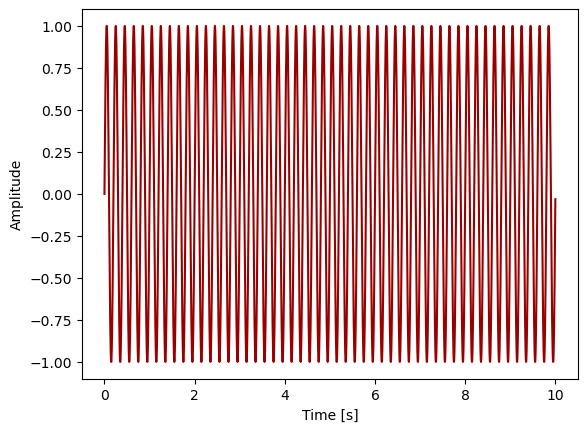

In [6]:
""" Create and plot a test signal. """
frequency = 5 #Hz

#create time axis variable
dt = 0.001 #seconds
t = np.arange(0,10, dt)

#create a test signal
y = np.sin(2*np.pi*frequency*t)

fig, ax= plt.subplots()
ax.plot(t,y,color="#990000")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Amplitude")
plt.show()



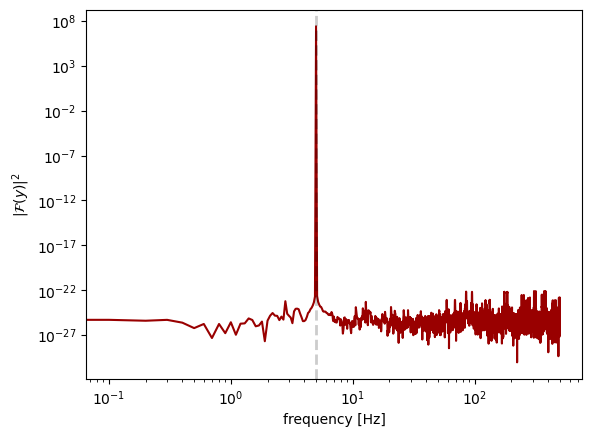

In [3]:
""" Compute the FFT of the test signal. """
#do the FFT
y_fft = fft.rfft(y)

#compute the power spectrum from the fft
y_power = np.abs(y_fft)**2

#get the frequnecies
freqs = fft.rfftfreq(len(y), dt) 

#NOTE: fast fourier transform _needs_ evenly spaced frequencies

#plot power spectrum
fig, ax= plt.subplots()
ax.plot(freqs,y_power,color="#990000")
ax.set_xlabel("frequency [Hz]")
ax.set_ylabel("$|\mathcal{F}(y)|^2$") #whew

#make log-log
ax.set_xscale("log")
ax.set_yscale("log")

#plot line at frq of signal to be sure
ax.axvline(frequency, color = "black", linestyle = "--", alpha = 0.2, linewidth = 2)

plt.show()

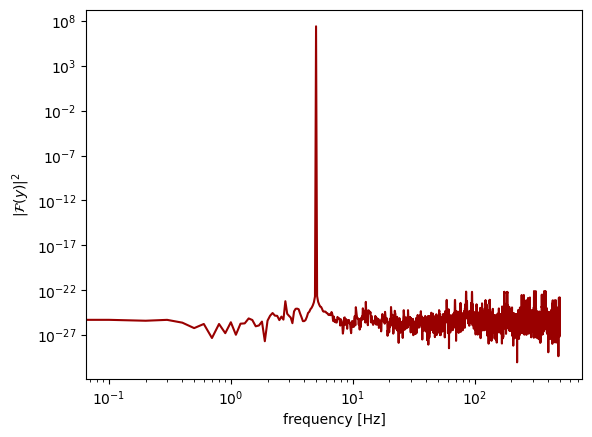

In [4]:
""" Make a function to compute the power spectrum of a signal. """

def power_spectrum(y, t):
    """ Compute the power spectrum of a signal. Returns frequencies and the power spectrum: freqs, y_power """
    
    #calcualte dt
    dt = t[1]- t[0]

    #do the FFT
    y_fft = fft.rfft(y)

    #compute the power spectrum from the fft
    y_power = np.abs(y_fft)**2

    #get the frequnecies
    freqs = fft.rfftfreq(len(y), dt) #just changed dt here to t

    return freqs, y_power

# also make a function for plotting
def plot_power_spectrum(freqs, y_power):
    """ Plots the power spectrum of a signal.  Returns the figure and axes: fig, ax """
    #plot power spectrum
    fig, ax= plt.subplots()
    ax.plot(freqs,y_power,color="#990000")
    ax.set_xlabel("frequency [Hz]")
    ax.set_ylabel("$|\mathcal{F}(y)|^2$") #whew

    #make log-log
    ax.set_xscale("log")
    ax.set_yscale("log")


    plt.show()


#test
power_spectrum(y, t)
plot_power_spectrum(freqs, y_power)

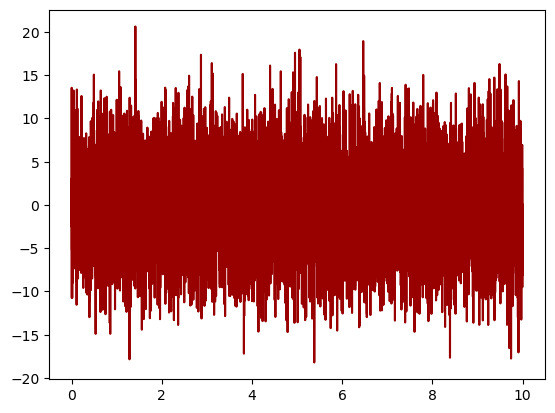

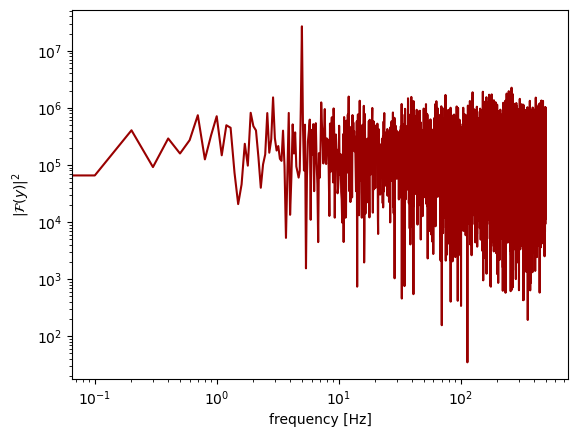

TypeError: cannot unpack non-iterable NoneType object

In [5]:
""" Get the power spectrum with noise added. """

y_noise = y + np.random.normal(0,5,len(y)) #center around 0, magnitude 5, and same number of vals as y

#plot noise
fig, ax = plt.subplots()
ax.plot(t, y_noise, color = "#990000")
plt.show()

#get the power spectrum 
freqs, y_power = power_spectrum(y_noise, t)

#plot at power spectrum
fig, ax = plot_power_spectrum(freqs, y_power)

#add line at frequency of signal
ax.axvline(frequency, color = "black", linestyle = "--", alpha = 0.2, linewidth = 2)
#not sure why error

plt.show()


# Real data

Download this data file: https://github.com/taobrienlbl/advanced_earth_science_data_analysis/blob/spring_2023_iub/lessons/11_spectral_analysis_intro/cannelton_flow.dat

The data file was obtained from https://waterdata.usgs.gov/nwis/dv/?site_no=03303280&PARAmeter_cd=00060 on 11/10/23 at about 11:16 AM Eastern.  It represents daily stream flow from 1975-present at a gauge on the Ohio River in Cannelton, IN

In [ ]:
""" Load the data file. """
import xarray as xr
import pandas as pd
import os
import scipy

""" Read the streamflow data file. """
filename = r"C:\Users\janel\OneDrive\Documents\IU grad\Classes F23\EAS 690 Advanced Data Science\G690_Test\lesson11\cannelton_flow.dat"


# read in the data file, 
#mine: didnt work : streamflow = pd.read_csv(filename, names = header)

#first 30 are desc
skiprows = 30

streamflow = pd.read_csv(
    "cannelton_flow.dat",
    skiprows = skiprows,
    delim_whitespace = True,
    names = ['org', 'id', 'date', 'flow', 'flag'],
    parse_dates=['date'],
    )
# show the top of the dataset
streamflow.head()

,org,id,date,flow,flag
0,USGS,3303280,1975-10-01,94800,A
1,USGS,3303280,1975-10-02,79900,A
2,USGS,3303280,1975-10-03,69000,A
3,USGS,3303280,1975-10-04,74700,A
4,USGS,3303280,1975-10-05,71700,A


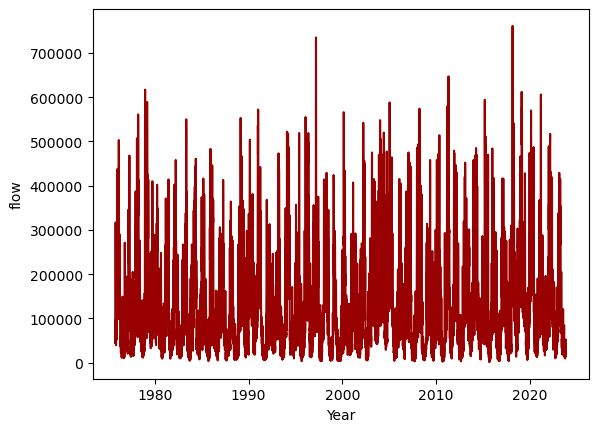

In [ ]:
""" Plot a time series of the data. """

fig, ax= plt.subplots()
ax.plot(streamflow['date'], streamflow["flow"], color="#990000")
ax.set_xlabel("Year")
ax.set_ylabel("flow")
plt.show()

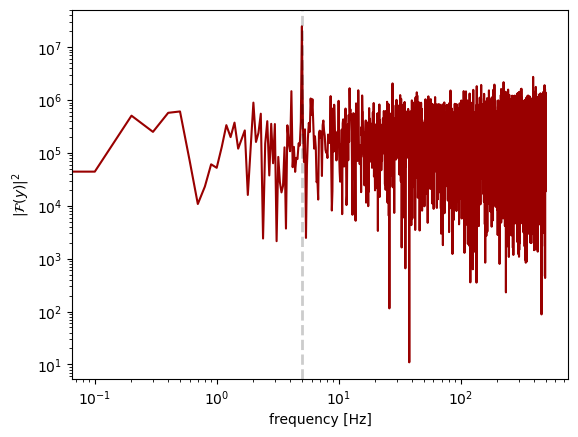

In [ ]:
""" Plot the power spectrum of the data. """

#convert time to seconds

power_spectrum(streamflow["date"], streamflow["flow"])
plot_power_spectrum(freqs, y_power)

In [ ]:
""" Plot the power spectrum of the data with the x-axis as period instead. """
#https://dsp.stackexchange.com/questions/64386/how-to-understand-the-sum-of-all-fourier-frequencies 



power_spectrum(streamflow["date"], streamflow["flow"])
plot_power_spectrum(freqs, y_power)